<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Analyzing  Road Safety Data

Author: <div class="LI-profile-badge"  data-version="v1" data-size="medium" data-locale="en_US" data-type="horizontal" data-theme="dark" data-vanity="aroraaman"><a class="LI-simple-link" href='https://au.linkedin.com/in/aroraaman?trk=profile-badge'>Aman Arora</a></div>  

---

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

In [2]:
DATA_PATH = "./uk-2016-road-safety-data/"
files = !ls $DATA_PATH
pd.read_excel(DATA_PATH + files.grep("xls").s, sheet_name=1, header=2)

,Accident Circumstances,Vehicle,Casualty
0,Accident Index,Accident Index,Accident Index
1,Police Force,Vehicle Reference,Vehicle Reference
2,Accident Severity,Vehicle Type,Casualty Reference
3,Number of Vehicles,Towing and Articulation,Casualty Class
4,Number of Casualties,Vehicle Manoeuvre,Sex of Casualty
5,Date (DD/MM/YYYY),Vehicle Location-Restricted Lane,Age of Casualty
6,Day of Week,Junction Location,Age Band of Casualty
7,Time (HH:MM),Skidding and Overturning,Casualty Severity
8,Location Easting OSGR (Null if not known),Hit Object in Carriageway,Pedestrian Location
9,Location Northing OSGR (Null if not known),Vehicle Leaving Carriageway,Pedestrian Movement


In [3]:
path = './uk-2016-road-safety-data/dftRoadSafety_Accidents_2016.csv'
df = pd.read_csv(path, dtype = {'LSOA_of_Accident_Location' : str}, 
                 na_values = np.NaN, index_col = 'Accident_Index')

In [4]:
for dtype in sorted(list(df.dtypes.value_counts().index)):
    print("\n____{}____".format(dtype))
    for f in list(df.dtypes[df.dtypes == dtype].index):
        print(f, len(df[f].unique()))


____int64____
Police_Force 51
Accident_Severity 3
Number_of_Vehicles 14
Number_of_Casualties 22
Day_of_Week 7
Local_Authority_(District) 380
1st_Road_Class 6
1st_Road_Number 4180
Road_Type 7
Junction_Detail 10
Junction_Control 6
2nd_Road_Class 7
2nd_Road_Number 3572
Pedestrian_Crossing-Human_Control 4
Pedestrian_Crossing-Physical_Facilities 7
Light_Conditions 6
Weather_Conditions 10
Road_Surface_Conditions 6
Special_Conditions_at_Site 9
Carriageway_Hazards 7
Urban_or_Rural_Area 3
Did_Police_Officer_Attend_Scene_of_Accident 3

____float64____
Location_Easting_OSGR 94589
Location_Northing_OSGR 97149
Longitude 130554
Latitude 129197
Speed_limit 7

____object____
Date 366
Time 1440
Local_Authority_(Highway) 207
LSOA_of_Accident_Location 28646


`Date` is not a pd.datetime object but rather only read as a string. 

In [5]:
df['ts'] = pd.to_datetime(df['Date'] + '-' \
                                 + df['Time'])
nan_time = list(df['ts'][df['ts'].isna()].index)
print("Dropping accidents:\n", nan_time, "due to a missing timestamp\n")
print("Before", df.shape)
df.dropna(subset=['ts'], inplace=True)

#accidents.reset_index(drop=False, inplace=True)
print("After", df.shape)

df['Date'] = df['ts'].dt.date
df['Month'] = df['ts'].dt.month
df['Hour'] = df['ts'].dt.hour

Dropping accidents:
 ['2016350023616', '2016350049516'] due to a missing timestamp

Before (136621, 32)
After (136619, 32)


**Checking accidents per month**

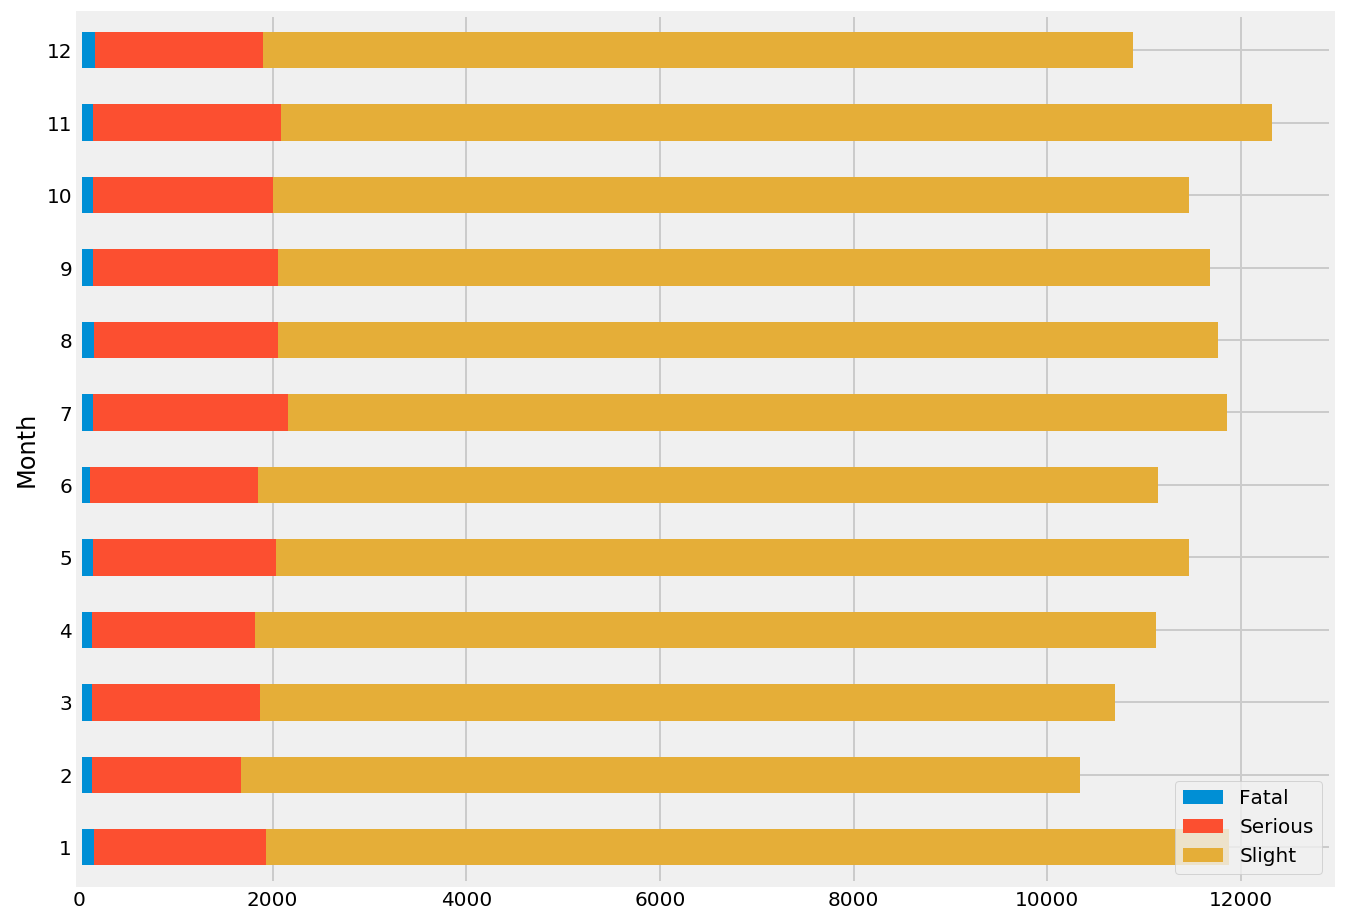

In [6]:
fig, ax = plt.subplots()
df.groupby('Month')['Accident_Severity'].value_counts().unstack(). \
    plot(kind = 'barh', stacked = True, figsize = (10, 8), ax=ax);
ax.legend(["Fatal", "Serious", "Slight"], loc='lower right');

It seems like the most number of accidents occured in the month of November and July. Also, the number of Accidents with Accident_Severity 1 is far less than the number of Accidents with Accident Severity 3.

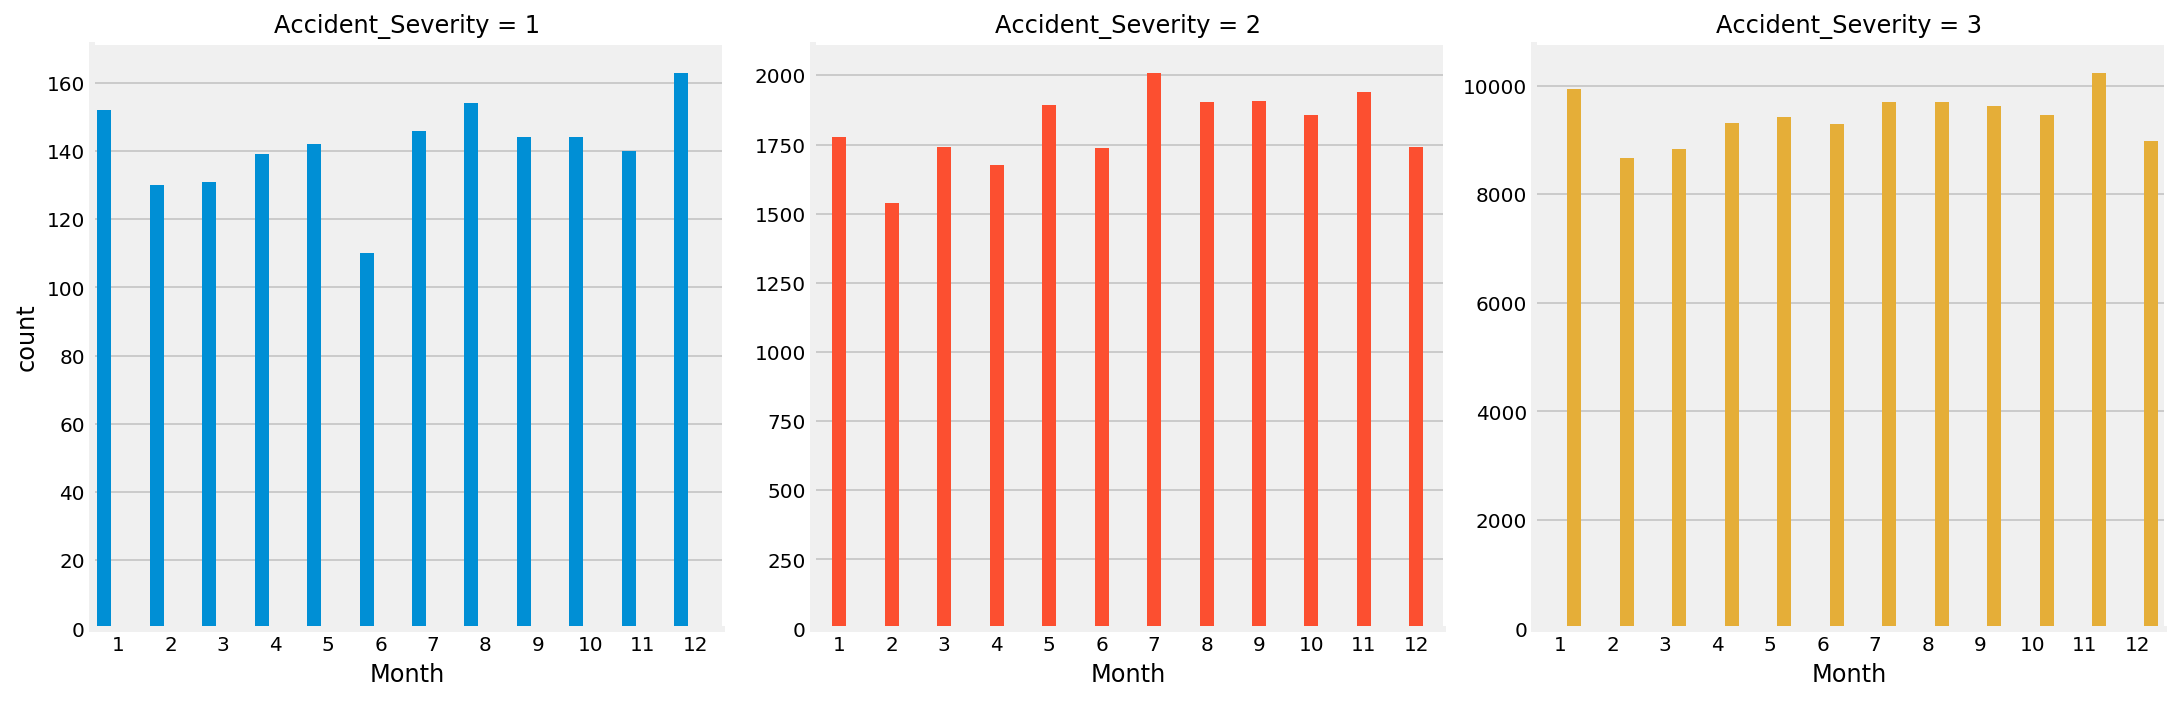

In [7]:
sns.catplot(x = 'Month', data = df, kind = 'count', 
            col = 'Accident_Severity', hue = 'Accident_Severity', 
            sharey = False, saturation = 1);

While most number of serious and slight accidents occur in the month of November, most number of fatal accidents occur in December.

**Checking accidents per hour**

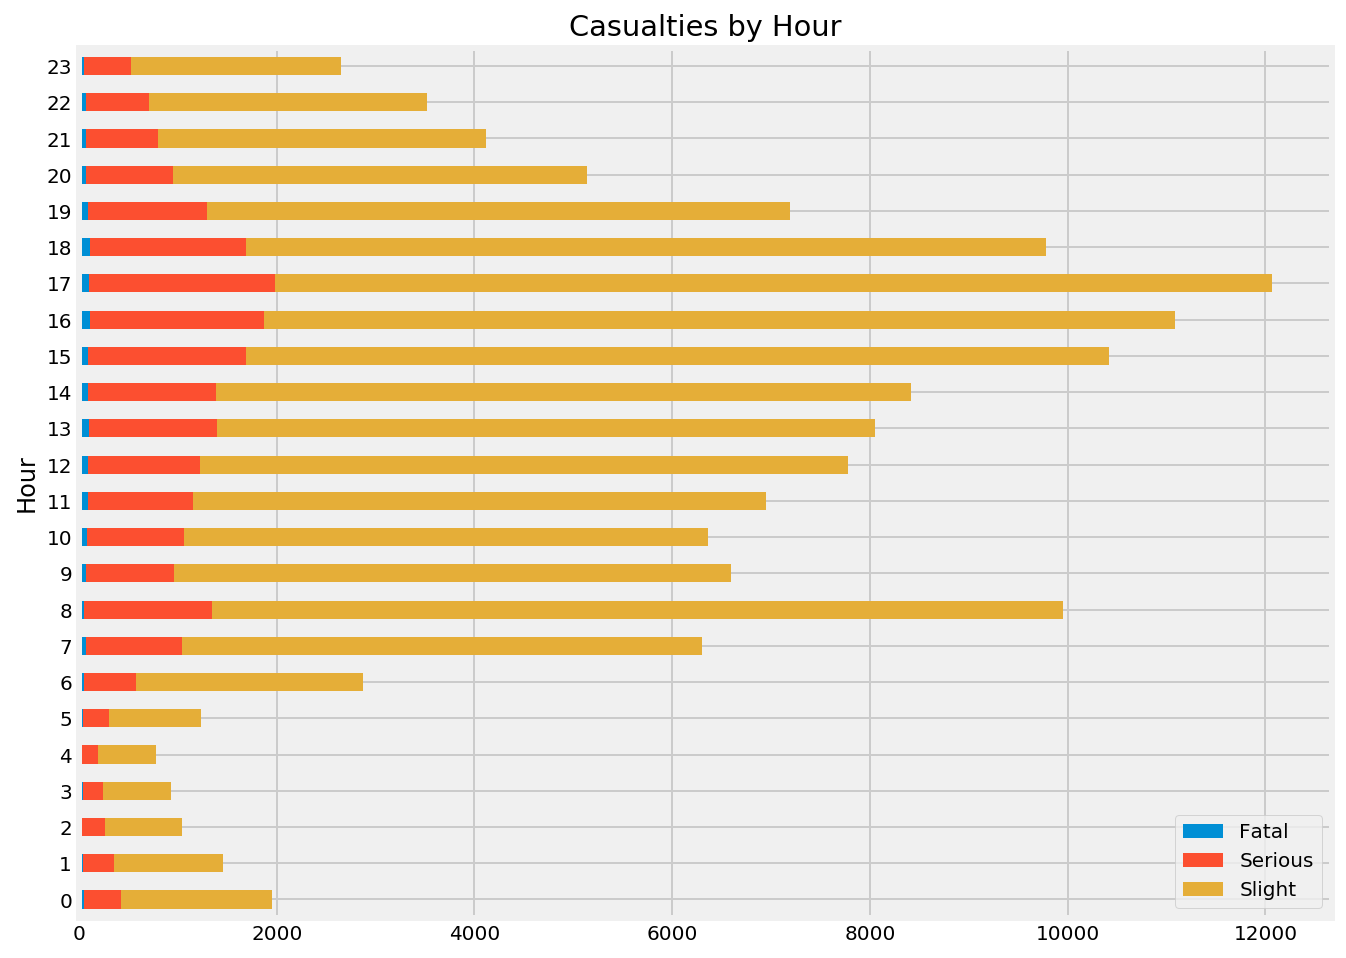

In [8]:
fig, ax = plt.subplots()
pd.crosstab(df['Hour'], df['Accident_Severity'])\
    .plot(kind='barh', stacked=True, figsize = (10,8), ax=ax,
    title='Casualties by Hour');
ax.legend(["Fatal", "Serious", "Slight"], loc='lower right');

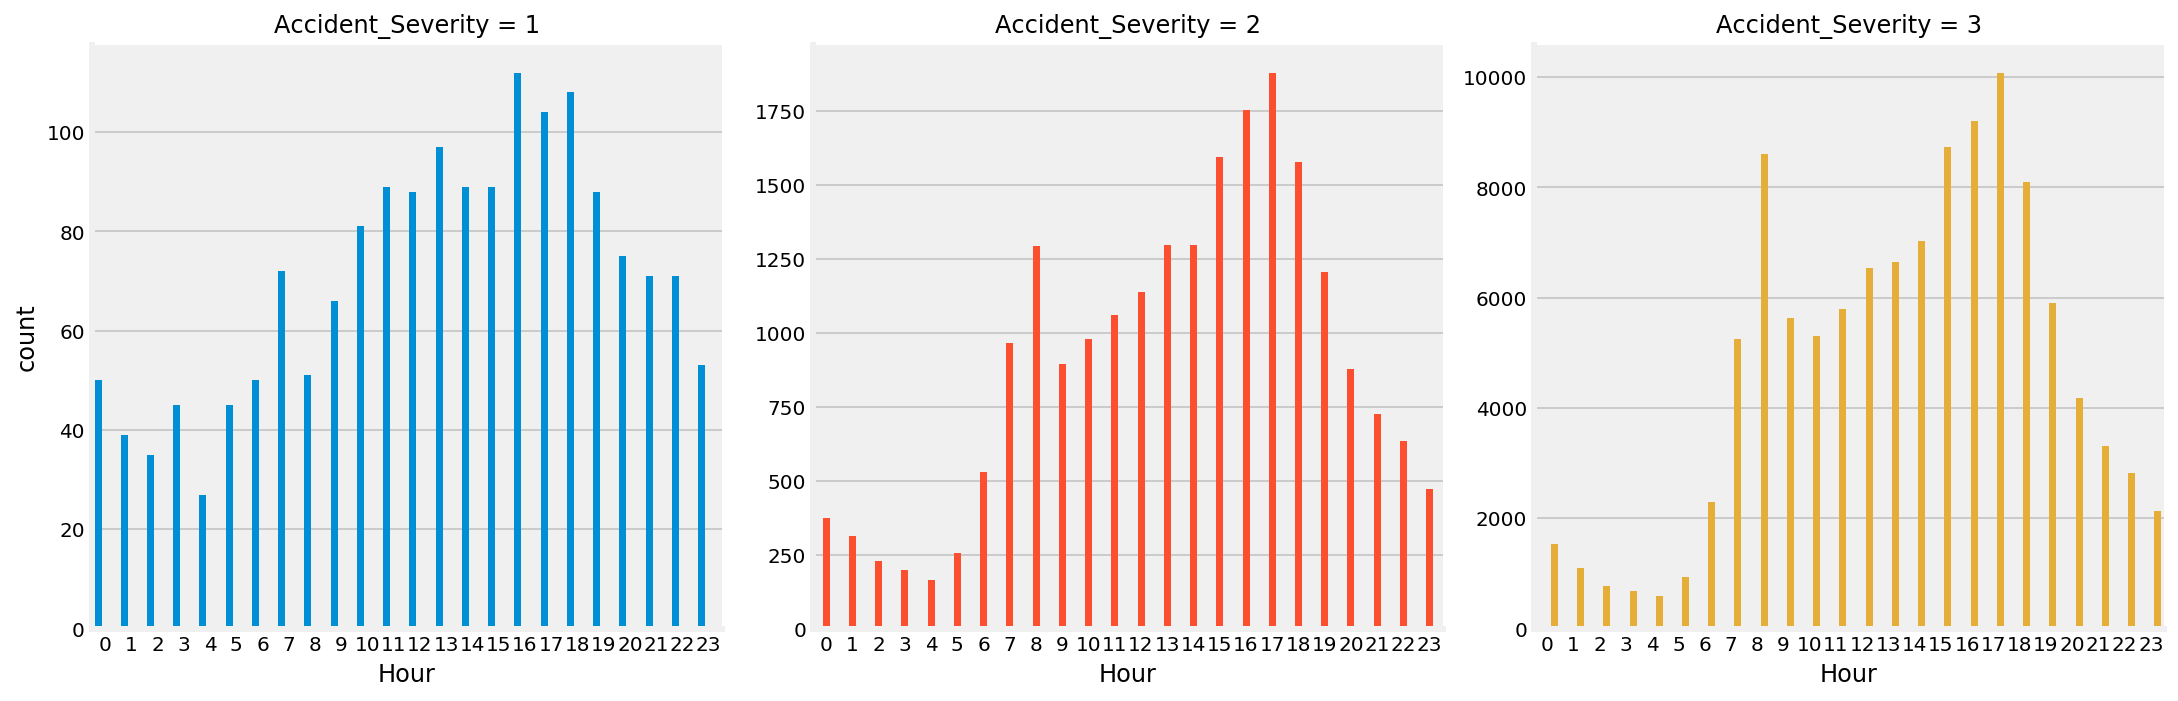

In [9]:
sns.catplot(x = 'Hour', data = df, kind = 'count', 
            col = 'Accident_Severity', hue = 'Accident_Severity', sharey = False, 
            saturation = 1);

In [10]:
df['Weather_Conditions'].replace(-1, 9, inplace = True)
weather_values = {1:"Fine no high winds", 2:"Raining no high winds",
                  3:"Snowing no high winds", 4:"Fine + high winds",
                  5:"Raining + high winds", 6:"Snowing + high winds",
                  7:"Fog or mist", 8:"Other", 9:"Unknown"}

def alphabetical_order_col(df,col_name):
    ordered_list = df[col_name].sort_values().unique()
    cleaned_list = [x for x in ordered_list if str(x) != 'nan']
    return cleaned_list

**Number of Casualties by Weather Conditions**

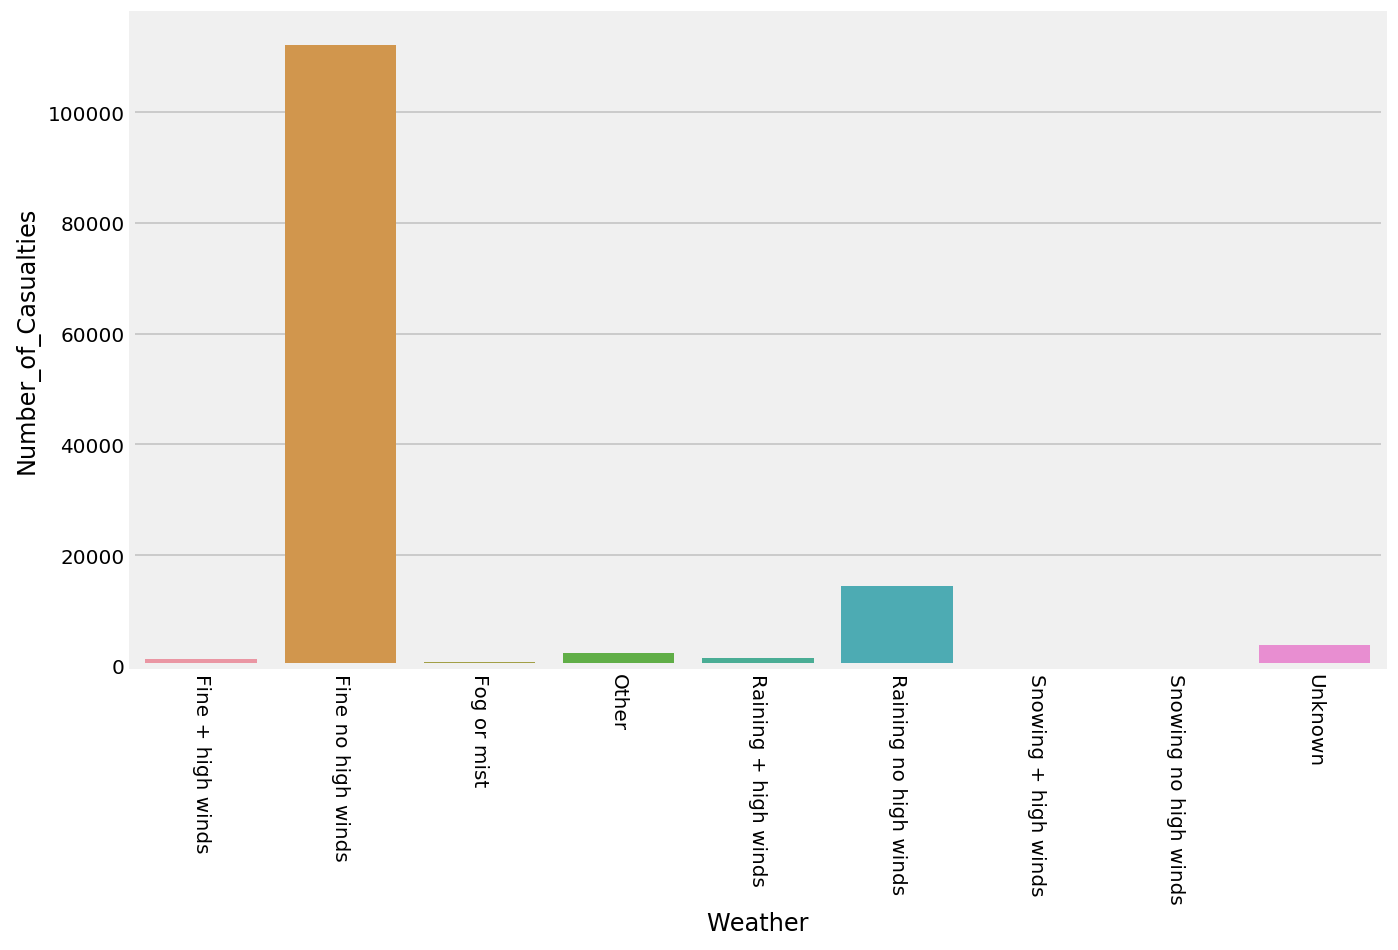

In [11]:
df['Weather'] = df['Weather_Conditions'].map(weather_values)
mask = (df['Weather'] != 'Unknown')

fig,ax = plt.subplots(figsize = (10,6))
a = sns.countplot(x='Weather', data = df, order = alphabetical_order_col(df,'Weather')); 
ax.set(ylabel = 'Number_of_Casualties');

for item in a.get_xticklabels():
    item.set_rotation(-90)

Even though 'Snowing + high winds' is not the most common weather type, I would be the most careful if for some reason I have to drive under this weather condition as it is the most risky weather type.

**Number of Vehicles Vs Number of Casualties**

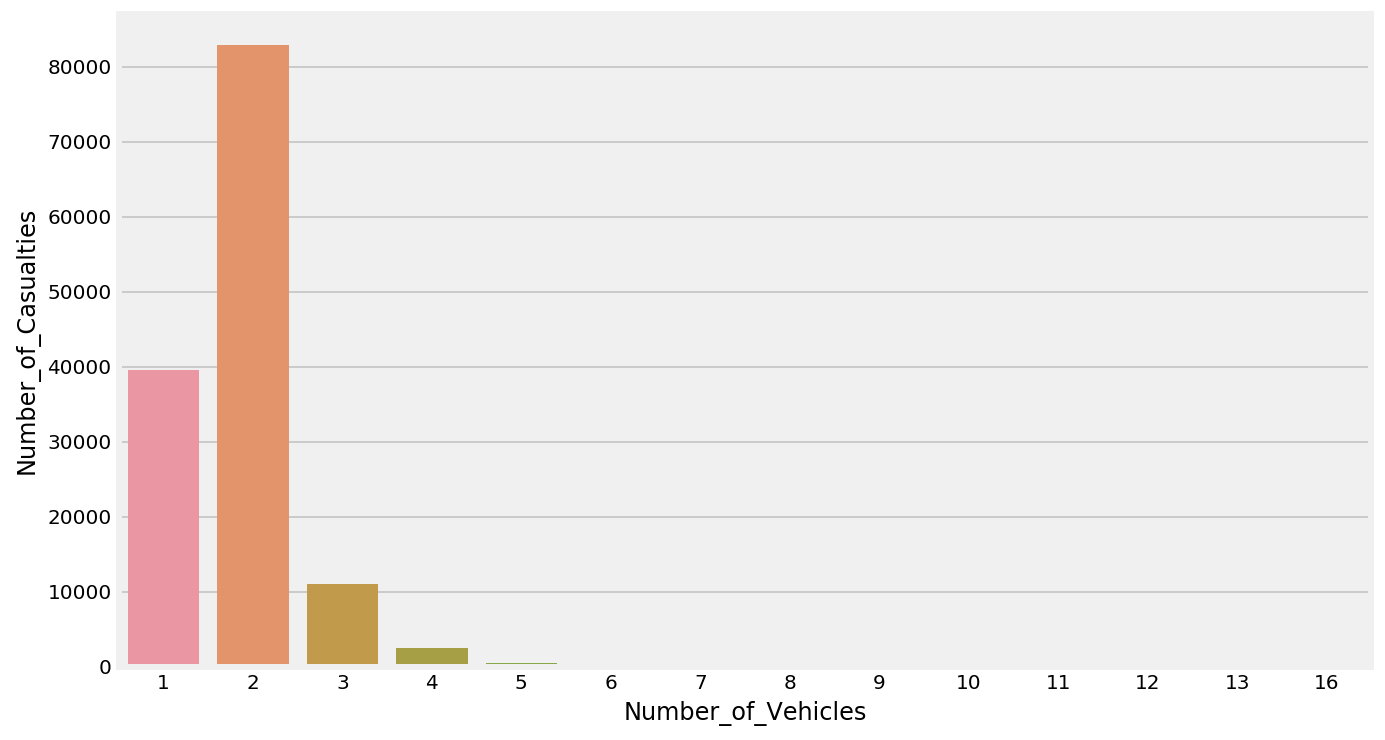

In [12]:
fig,ax = plt.subplots(figsize = (10,6))
sns.countplot('Number_of_Vehicles', data = df);
ax.set(ylabel = 'Number_of_Casualties');

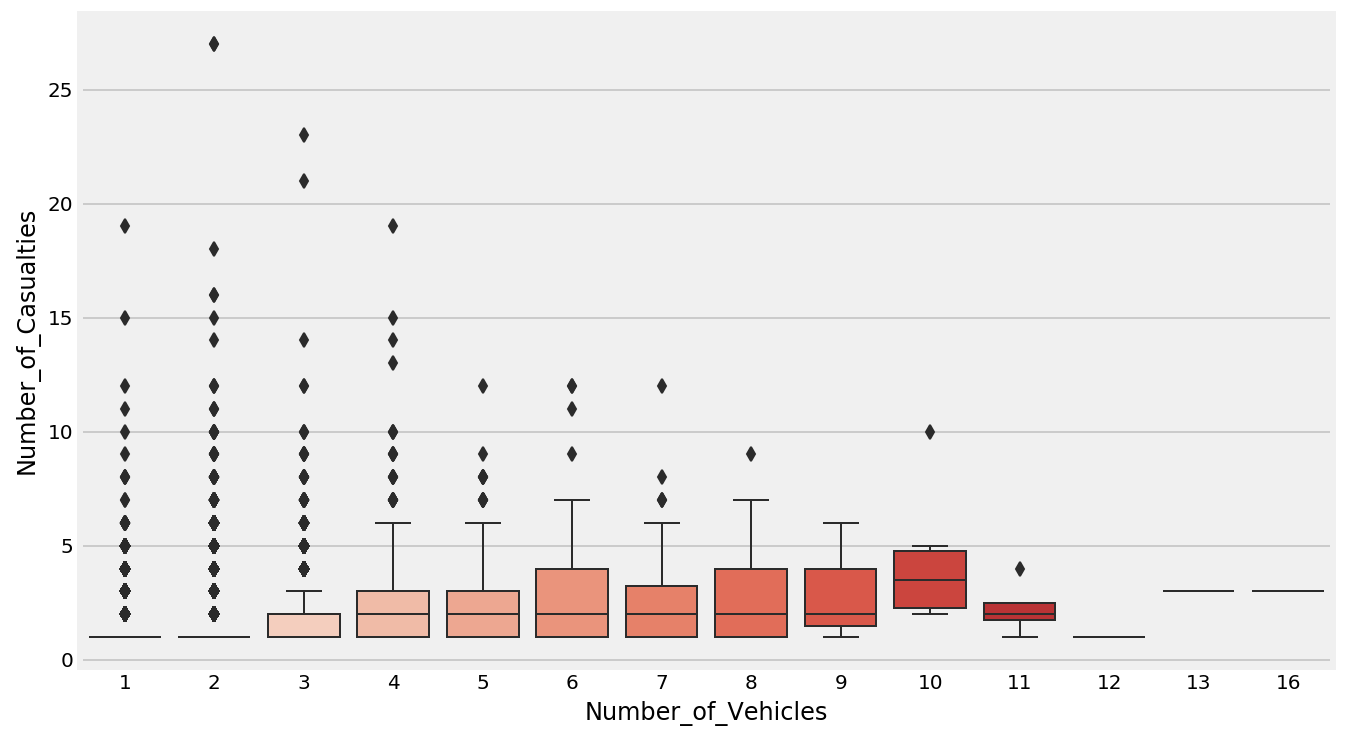

In [13]:
under_50_casualties_mask = df['Number_of_Casualties']<50

fig,ax = plt.subplots(figsize = (10,6))
sns.boxplot(x='Number_of_Vehicles', y='Number_of_Casualties', 
            data=df[under_50_casualties_mask], palette = "Reds", 
            linewidth = 1, width = 0.8); 

I can see a trend where the average number of casualties per accident increases as the number of vehicles increases till Vehicle 10, and it drops at 11 and starts increasing again. There are not many observations after Number of Vehicles 4, so we cannot really predict a trend or say anything with absolute certainty but this does suggest that it becomes more risky as more number of Vehicles are involved. <br>
Also, there were 58 number of casualties when number of Vehicles was 2. While, this might seem odd at first, one of the vehicles involved was a bus. It occured on 14-07-2016 under fine with low winds weather conditions on a dry road condition between a bus and a second vehicle at 15:00 hours.

**Speed Limit vs Number of Casualties**

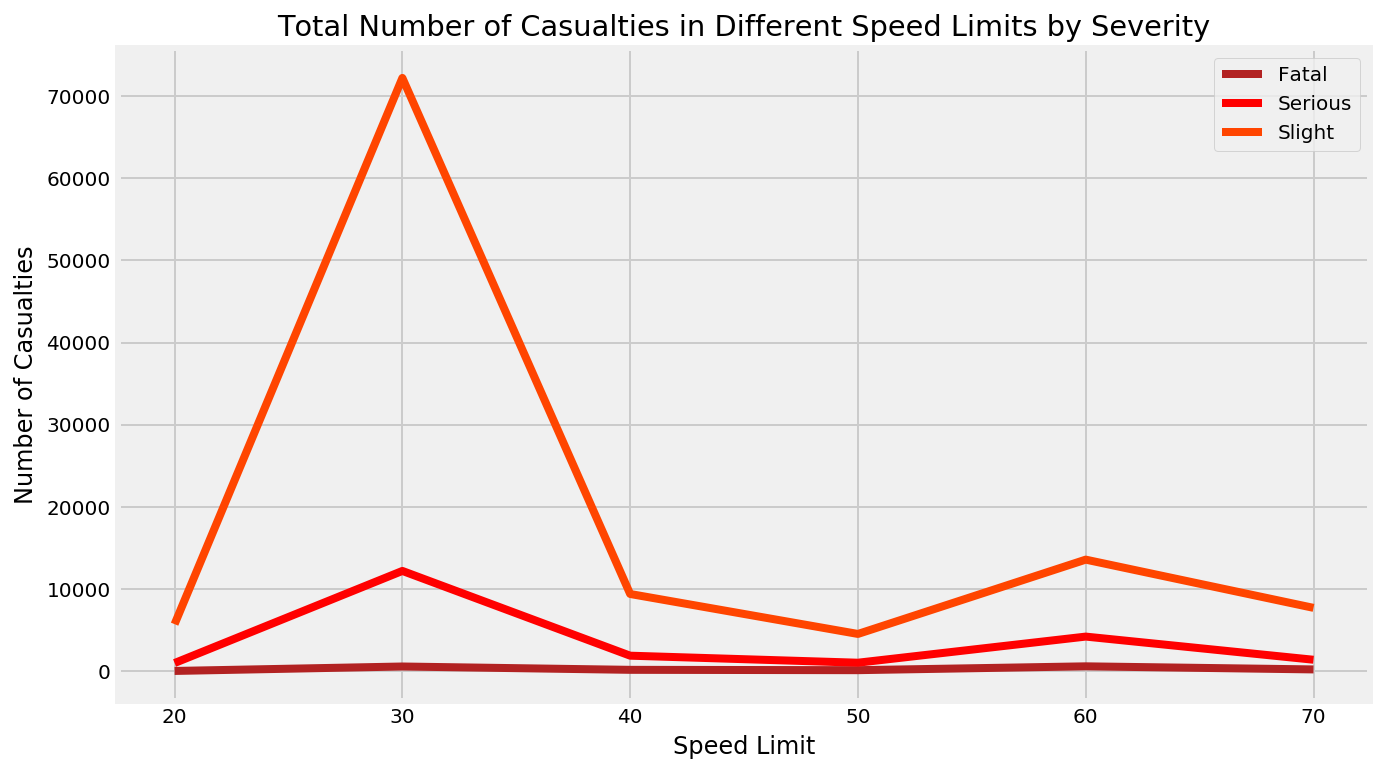

In [14]:
pd.DataFrame(df.groupby(['Speed_limit','Accident_Severity'])
            ['Speed_limit'].count().unstack())\
    .plot(kind='line', figsize=(10,6),\
          color = ['firebrick','red','orangered'],
          title='Total Number of Casualties in Different Speed Limits by Severity');
plt.xlabel("Speed Limit");
plt.ylabel("Number of Casualties");
plt.legend(["Fatal", "Serious", "Slight"]);

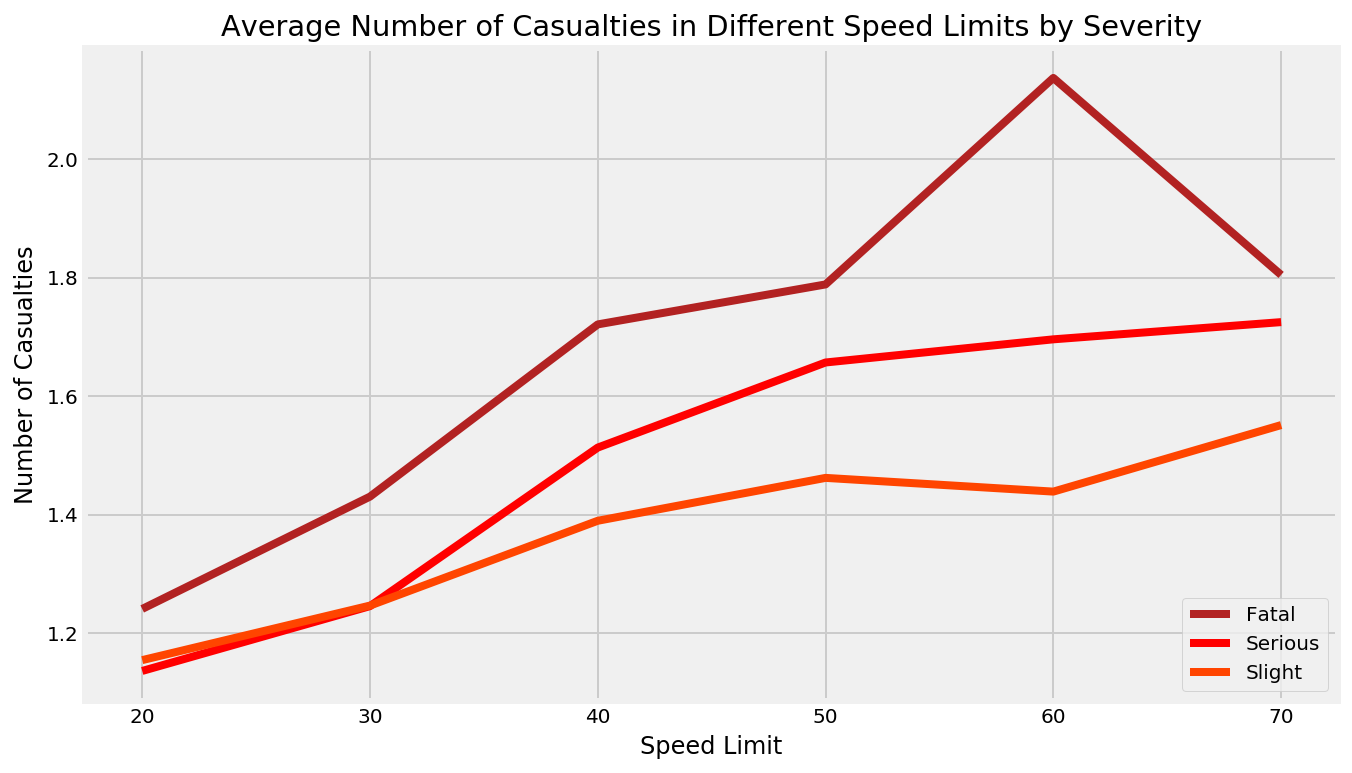

In [15]:
df.groupby(['Speed_limit','Accident_Severity'])\
            ['Number_of_Casualties'].mean().unstack()\
            .plot(kind = 'line', figsize = (10,6),
                  color = ['firebrick','red','orangered'],
                  title='Average Number of Casualties in Different Speed Limits by Severity');

plt.xlabel("Speed Limit");
plt.ylabel("Number of Casualties");
plt.legend(["Fatal", "Serious", "Slight"], loc='lower right');

As the speed limit increases, the risk and the number of casualties per accident increases. This makes sense as the impact is much greater when the speed of Vehicle is high. 

In [16]:
#adding more data files to our current df
casualties = pd.read_csv(DATA_PATH + "Cas.csv", na_values=np.NaN,
                         index_col=['Accident_Index','Vehicle_Reference'])
print("Dim casualties", casualties.shape)
casualties = casualties[~casualties.index.duplicated()]
print("Dim casualties (no duplicates)", casualties.shape)

vehicles = pd.read_csv(DATA_PATH + "Veh.csv", na_values=np.NaN,
                       index_col=['Accident_Index','Vehicle_Reference'])
print("\nDim vehicles", vehicles.shape)
vehicles = vehicles[~vehicles.index.duplicated()]
print("Dim casualties (no duplicates)", vehicles.shape)

df_join = casualties.join(vehicles)
print("\nKeeping vehicles with casualties", df.shape)
df = df.join(df_join)
print("Adding accidents data", df.shape)

Dim casualties (181384, 14)
Dim casualties (no duplicates) (154500, 14)

Dim vehicles (252500, 21)
Dim casualties (no duplicates) (252500, 21)

Keeping vehicles with casualties (136619, 35)
Adding accidents data (154497, 70)


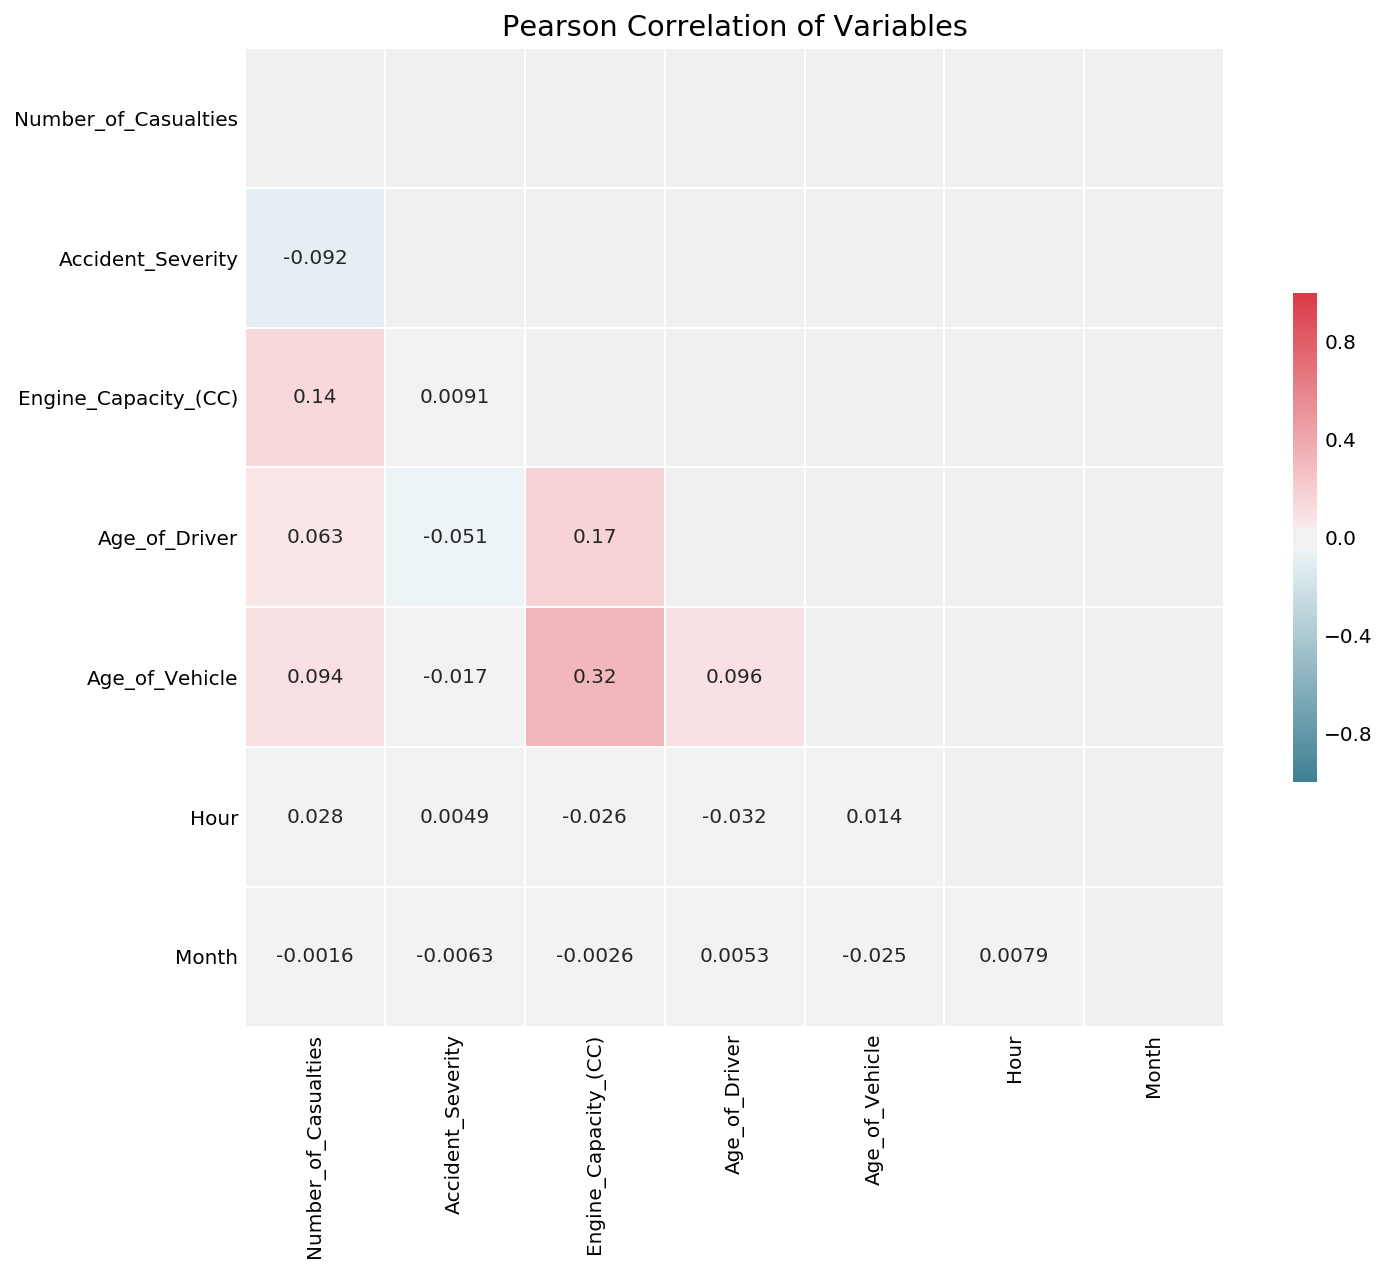

In [17]:
features = ['Number_of_Casualties','Accident_Severity','Engine_Capacity_(CC)',
            'Age_of_Driver','Age_of_Vehicle','Hour','Month']
corr = df[features].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9));
cmap = sns.diverging_palette(220, 10, as_cmap=True);
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, vmin = -1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True) ;
plt.title("Pearson Correlation of Variables");

There is high density for number of accidents occuring with the age_of_driver being ~22 at ~17:00 hours. 

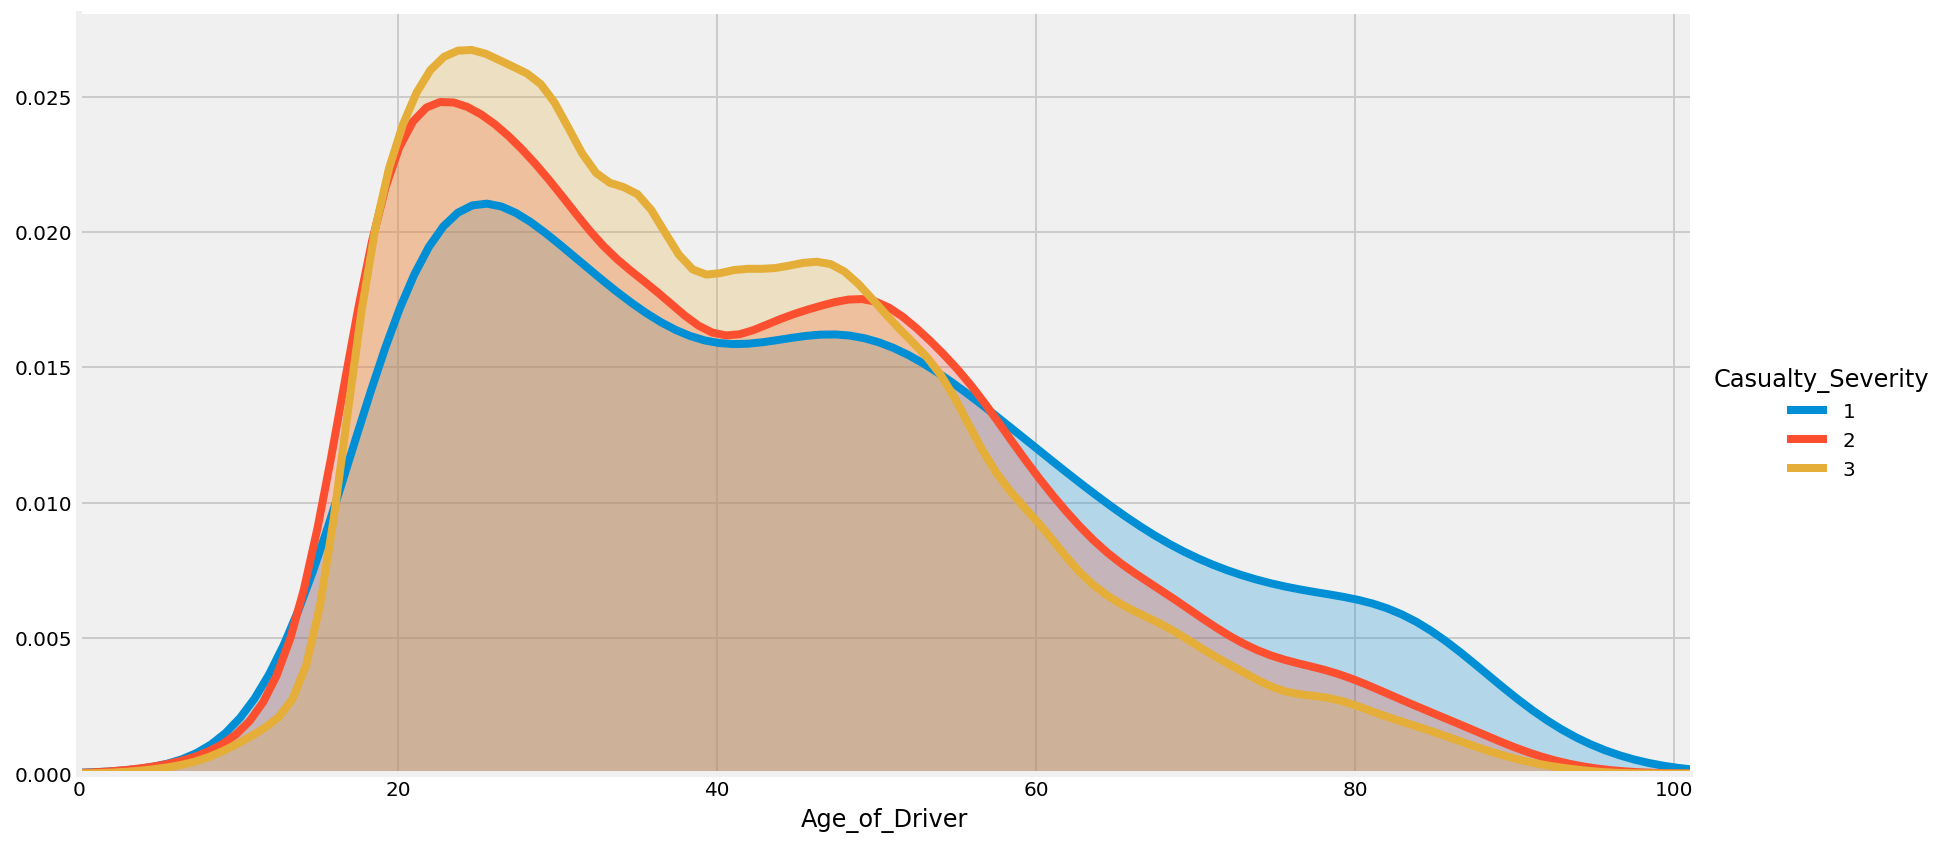

In [19]:
a = sns.FacetGrid(df[age_of_driver_not_null], hue = 'Casualty_Severity', height = 6, aspect=2 );
a.map(sns.kdeplot, 'Age_of_Driver', shade= True );
a.set(xlim=(0, df['Age_of_Driver'].max()));
a.add_legend();

This graph tells me a story that for drivers who are kids or people aged > 60, accidents tend to be more fatal than slight. And logic exists to support this hypothesis, kids are only learning to drive and are less experienced (tend to be reckless) while for aged people, the reflexes tend to get slower.

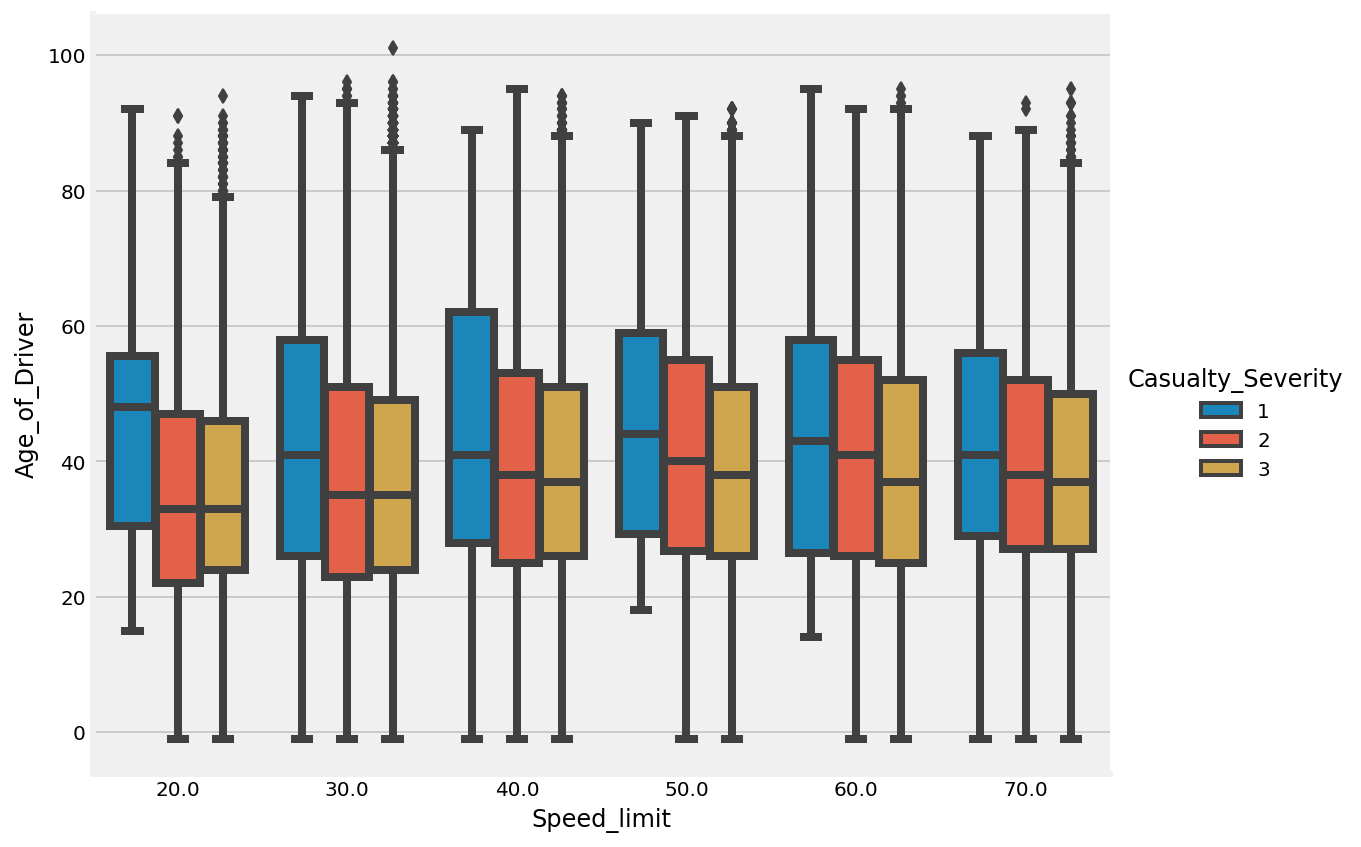

In [20]:
sns.catplot(x="Speed_limit", y="Age_of_Driver", kind="box", data=df, 
            height=6, aspect = 4/3, hue = 'Casualty_Severity');

Age of Driver for fatal accidents tends to be slightly higher. 

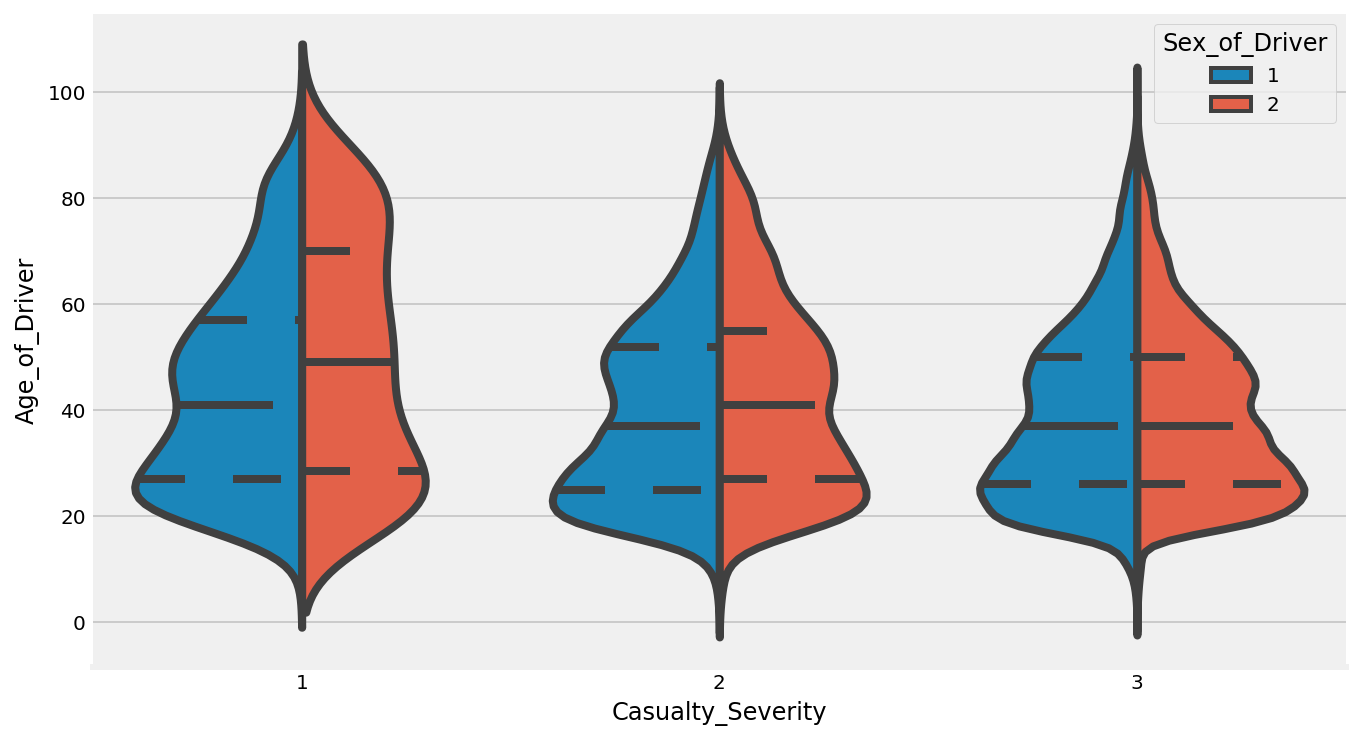

In [21]:
age_not_null = np.logical_and(df['Sex_of_Driver'].isin((1,2)), df['Age_of_Driver']!=(-1))
fig, ax = plt.subplots(figsize = (10,6))
sns.violinplot(x="Casualty_Severity", y="Age_of_Driver", hue = 'Sex_of_Driver',split=True, inner="quart", 
               data=df[age_not_null]);
sns.despine(left=True)

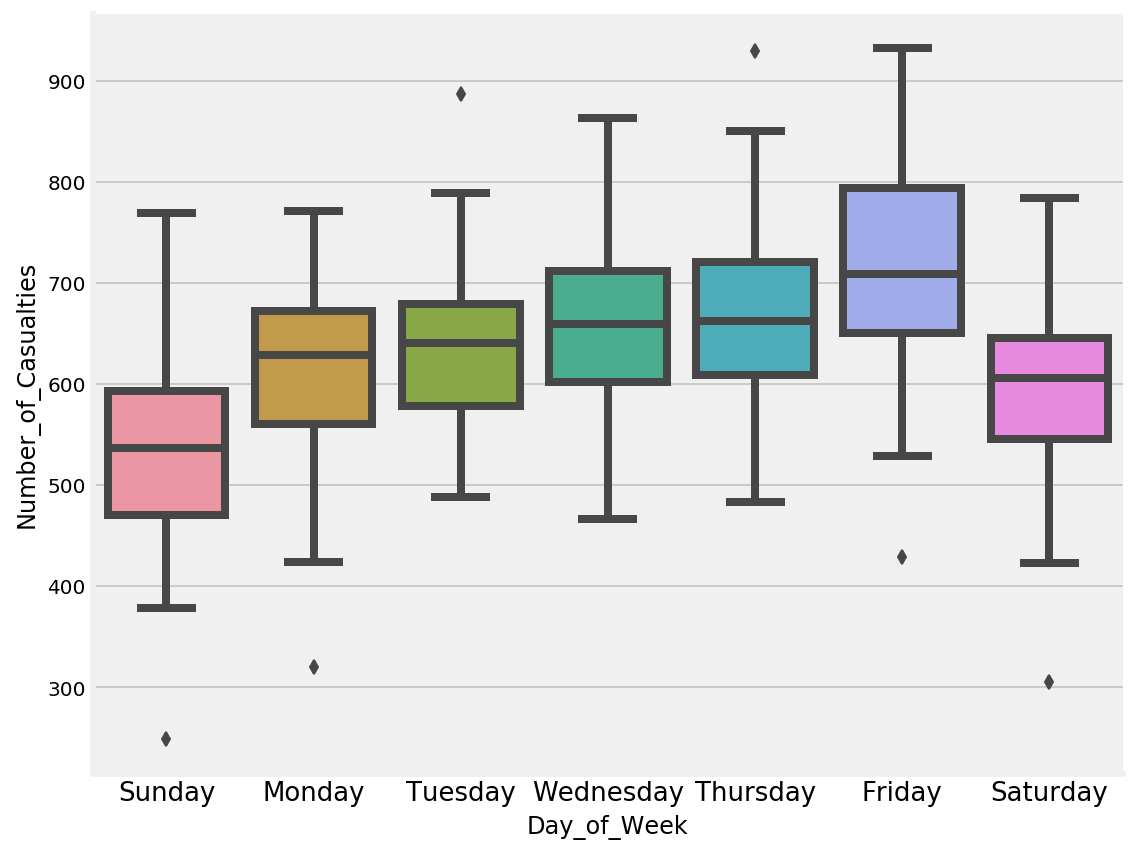

In [22]:
data=df.groupby(['Date', 'Day_of_Week', 'Month']).sum()\
            ['Number_of_Casualties'].to_frame().reset_index() 
sns.catplot(x='Day_of_Week', y='Number_of_Casualties', data=data,
            height = 6, aspect =4/3, kind = 'box');
x_axis = np.arange(0,7,1)
plt.xticks(x_axis, ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), fontsize=13);

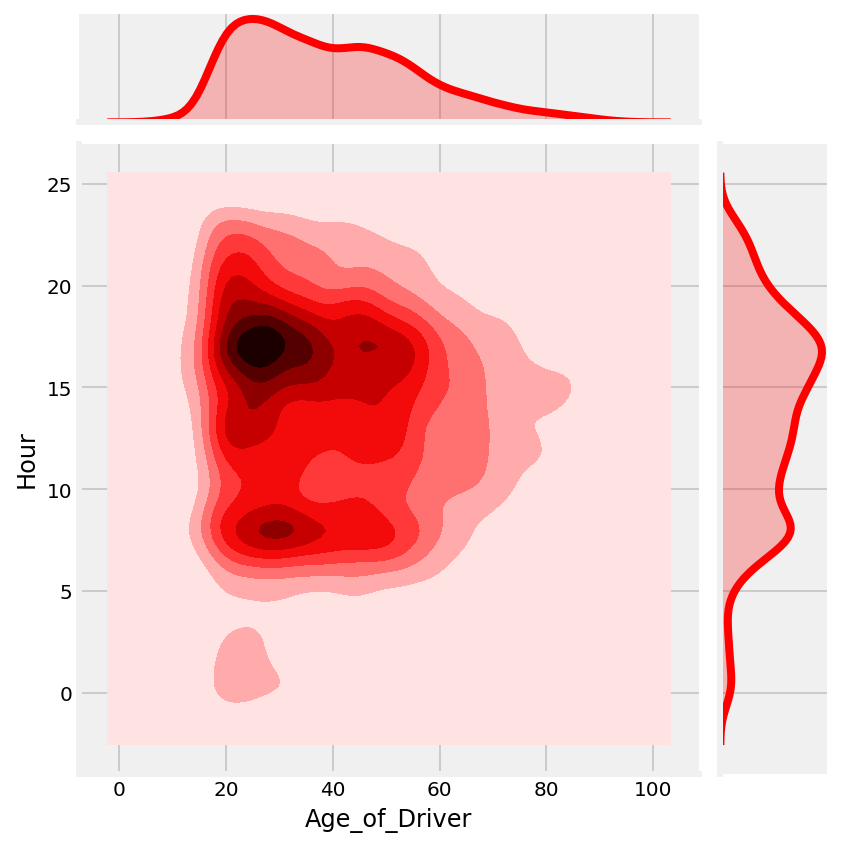

In [23]:
age_of_driver_not_null = df['Age_of_Driver'] != (-1)
sns.jointplot(x='Age_of_Driver', y='Hour', data=df.loc[age_of_driver_not_null,].sample(10000), 
              kind = 'kde', height = 6, color = 'red');

There are some general facts from the data that are noticeable: <br>
- People liked to drive new vehicles 
- Engine Capacity was mostly less than 5000CC
- There was a definite peak (maximum number) of drivers between the age of 20-25 who were incolved in accidents. 
- A maximum number of accidents were reported at a speed limit of 30 and then 60. (Possible reason : UK has speed limit of 30 on certain roads) 
- The Age of driver slightly decreased with casualty severity being from fatal to slight. 
- More number of accidents were reported early in the morning at 8:00am and then in the evening between 15:00 and 18:00 hours. 
- While more number of accidents were reported in November for Serious and Slight accidents, more fatal accidents occured in December. 
- For drivers aged less than 10 years and more than 60 years, accidents tend to be more fatal. 
- A high density (number) of accidents was reported at around 15:00 hours with the age of driver being approx 22 years old. 
- The risk of casualty increased with an increase in Speed Limit. 
- The risk of casualty increased with an increase in the number of vehicles involved in the accident. 
- Most number of casualties occured with 2 vehicles being involved. One of them even led to 58 casualties (rare case) worth mentioning. 
- Most number of casualties occured under Fine Weather conditions and next was rain (with no high winds) however, the most dangerous weather condition is 'Snow & High Winds'.